In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

Dataset Loading & Preprocessing

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 = 784) for Dense network
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# One-hot encode the labels (0-9 digits)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Testing data shape: (10000, 784)


Model Architecture

In [3]:
# Build the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),   # First hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),                      # Second hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),                      # Third hidden layer
    Dropout(0.2),

    Dense(10, activation='softmax')                     # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,506 (2.18 MB)

 Trainable params: 568,970 (2.17 MB)

 Non-trainable params: 1,536 (6.00 KB)

Model Training

In [4]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8176 - loss: 0.5962 - val_accuracy: 0.9583 - val_loss: 0.1345
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9501 - loss: 0.1622 - val_accuracy: 0.9644 - val_loss: 0.1191
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9617 - loss: 0.1253 - val_accuracy: 0.9726 - val_loss: 0.0915
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9700 - loss: 0.0974 - val_accuracy: 0.9737 - val_loss: 0.0905
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9731 - loss: 0.0837 - val_accuracy: 0.9761 - val_loss: 0.0844
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9770 - loss: 0.0719 - val_accuracy: 0.9760 - val_loss: 0.0850
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9783 - loss: 0.0675 - val_accuracy: 0.9753 - val_loss: 0.0856
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9796 - loss: 0.0639 - va

Visualization of Training & Validation

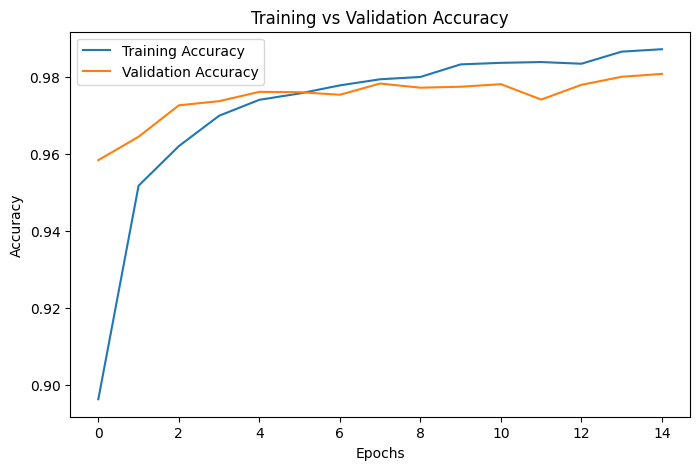

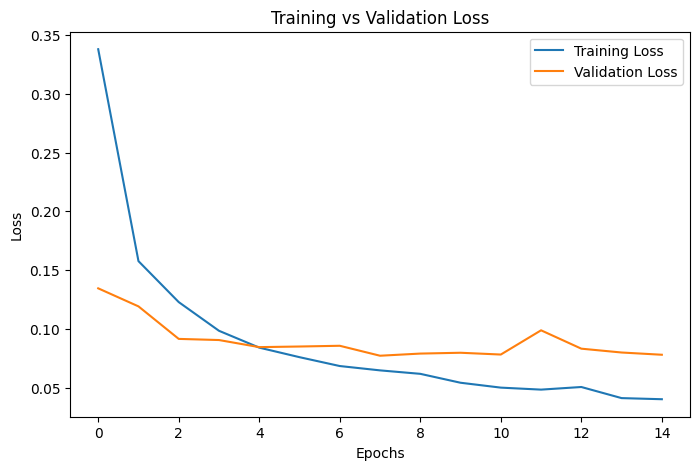

In [5]:
# Plot accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Evaluation on Test Data

In [6]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f" Final Test Accuracy: {test_acc*100:.2f}%")

 Final Test Accuracy: 98.07%


Prediction Example

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


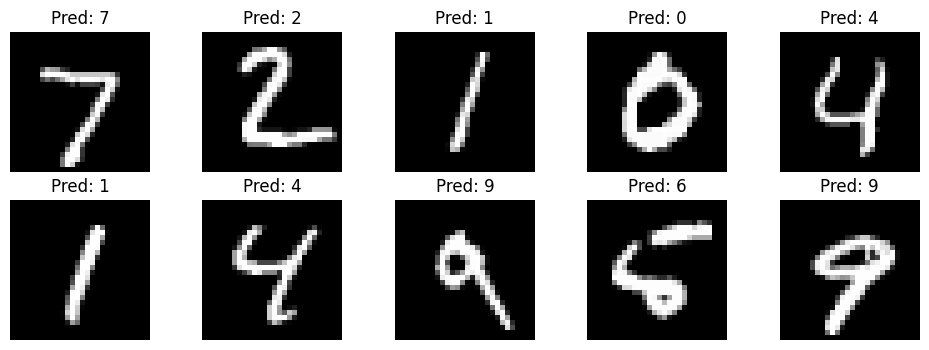

In [7]:
# Predict on first 10 test images
predictions = model.predict(x_test[:10])

plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()